In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import stats
import os

In [3]:
def kde_project(filePath,ref,plane,atomsSorted):
    data = []
    for item in ref:
        for item1 in atomsSorted:
            if item1[0]==item:
                if plane.upper()=='XY':
                    data.append([item1[1][0],item1[1][1]])
                if plane.upper()=='XZ':
                    data.append([item1[1][0],item1[1][2]])
                if plane.upper()=='YZ':
                    data.append([item1[1][1],item1[1][2]]) 
    dataA=np.asarray(data)
    meanX,meanY = np.mean(dataA,axis=0)
    df = pd.DataFrame(dataA, columns=["x", "y"])
    
    averCIF = open(os.path.join(filePath, "ceriaB.cif"),"r")
    for i in range(6):
        averCIF.readline()
    lattParaA = float(averCIF.readline().split()[1])
    lattParaB = float(averCIF.readline().split()[1])
    lattParaC = float(averCIF.readline().split()[1])
    for i in range(18):
        averCIF.readline()
    atomsCoord = []
    for i in range(12):
        line = averCIF.readline()
        atomsCoord.append([float(x) for x in line.split()[3:6]])
    averCIF.close()

    f = plt.figure(figsize=(18, 16))
    gs = gridspec.GridSpec(1, 2, width_ratios=[8, 1]) 
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax1.set_xlim([meanX-0.25,meanX+0.25])
    ax1.set_ylim([meanY-0.25,meanY+0.25])
    ax1.tick_params(axis='x',direction='out', length=12, width=5,labelsize=45)
    ax1.tick_params(axis='y',direction='out', length=12, width=5,labelsize=45)
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['right'].set_linewidth(2)
    ax1.spines['top'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    ax2.tick_params(axis='y',direction='out', length=12, width=5,labelsize=45)
    axKDE=sns.kdeplot(df.x, df.y, ax=ax1,cmap="jet", n_levels=60, shade=True,cbar=True,cbar_ax=ax2);
    if plane.upper()=='XY':
        axKDE.set_xlabel(xlabel='X Cartesian Coordiate ($\AA$)', fontsize=55);
        axKDE.set_ylabel(ylabel='Y Cartesian Coordiate ($\AA$)', fontsize=55);
        sum1 = 0
        sum2 = 0
        for item in ref:
            sum1 += atomsCoord[item-1][0]
            sum2 += atomsCoord[item-1][1]
        averFrac1 = sum1/len(ref)
        averFrac2 = sum2/len(ref)
        lattPara1 = lattParaA
        lattPara2 = lattParaB
        Cart1 = lattPara1 * averFrac1
        Cart2 = lattPara2 * averFrac2
        ax1.plot(Cart1, Cart2, color='azure',marker='+', mew=5, ms=45)
    if plane.upper()=='XZ':
        axKDE.set_xlabel(xlabel='X Cartesian Coordiate ($\AA$)', fontsize=55);
        axKDE.set_ylabel(ylabel='Z Cartesian Coordiate ($\AA$)', fontsize=55);
        sum1 = 0
        sum2 = 0
        for item in ref:
            sum1 += atomsCoord[item-1][0]
            sum2 += atomsCoord[item-1][2]
        averFrac1 = sum1/len(ref)
        averFrac2 = sum2/len(ref)
        lattPara1 = lattParaA
        lattPara2 = lattParaC
        Cart1 = lattPara1 * averFrac1
        Cart2 = lattPara2 * averFrac2
        ax1.plot(Cart1, Cart2, color='azure',marker='+', mew=5, ms=45)
    if plane.upper()=='YZ':
        axKDE.set_xlabel(xlabel='Y Cartesian Coordiate ($\AA$)', fontsize=55);
        axKDE.set_ylabel(ylabel='Z Cartesian Coordiate ($\AA$)', fontsize=55);
        sum1 = 0
        sum2 = 0
        for item in ref:
            sum1 += atomsCoord[item-1][1]
            sum2 += atomsCoord[item-1][2]
        averFrac1 = sum1/len(ref)
        averFrac2 = sum2/len(ref)
        lattPara1 = lattParaB
        lattPara2 = lattParaC
        Cart1 = lattPara1 * averFrac1
        Cart2 = lattPara2 * averFrac2
        ax1.plot(Cart1, Cart2, color='azure',marker='+', mew=5, ms=45)

In [4]:
filePath = input("Please input the full path to the 'Cart_coord_ceriaB.txt' file: ")
fileName = os.path.join(filePath, "Cart_coord_ceriaB.txt")
carCordFile = open(fileName, "r")
for i in range(6):
    line = carCordFile.readline()
atoms = []
line = carCordFile.readline()
while line:
    atoms.append([int(line.split()[0]),[float(x) for x in 
      line.split()[1:7]],[int(x) for x in line.split()[7:10]]])
    line = carCordFile.readline()
carCordFile.close()
atomsSorted = sorted(atoms,key=lambda x: x[0], reverse=False)

Please input the full path to the 'Cart_coord_ceriaB.txt' file: /Users/zyp-xin/pCloud Drive/Documents/RMC_Dev/Resolution_Correction/Analysis/CeriaB_30x30x30_R2_S2_NewDCS_7_CP2


/Users/zyp-xin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


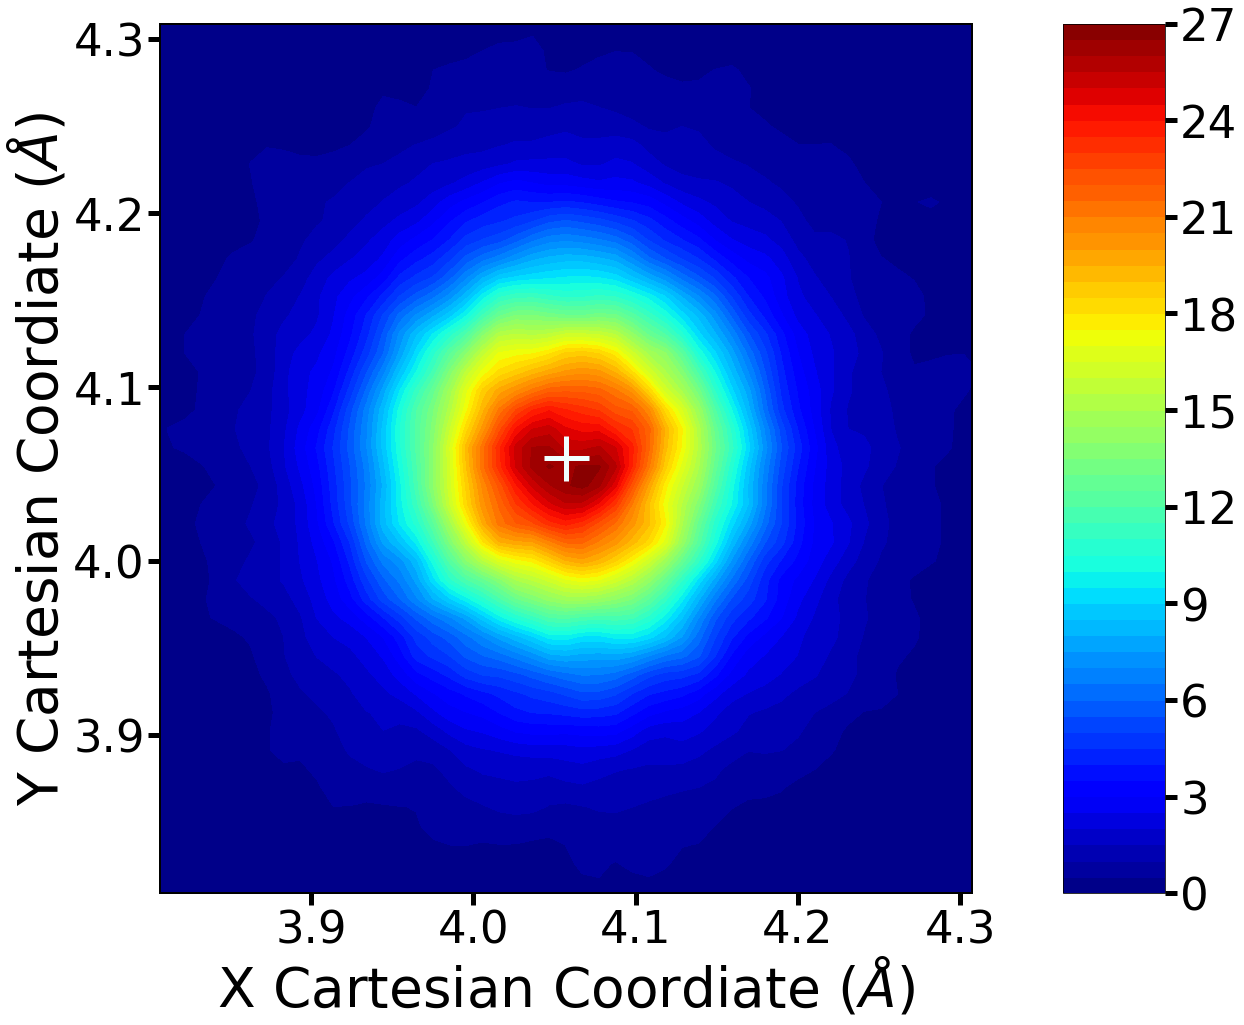

In [5]:
kde_project(filePath,[2,3],'xy',atomsSorted)

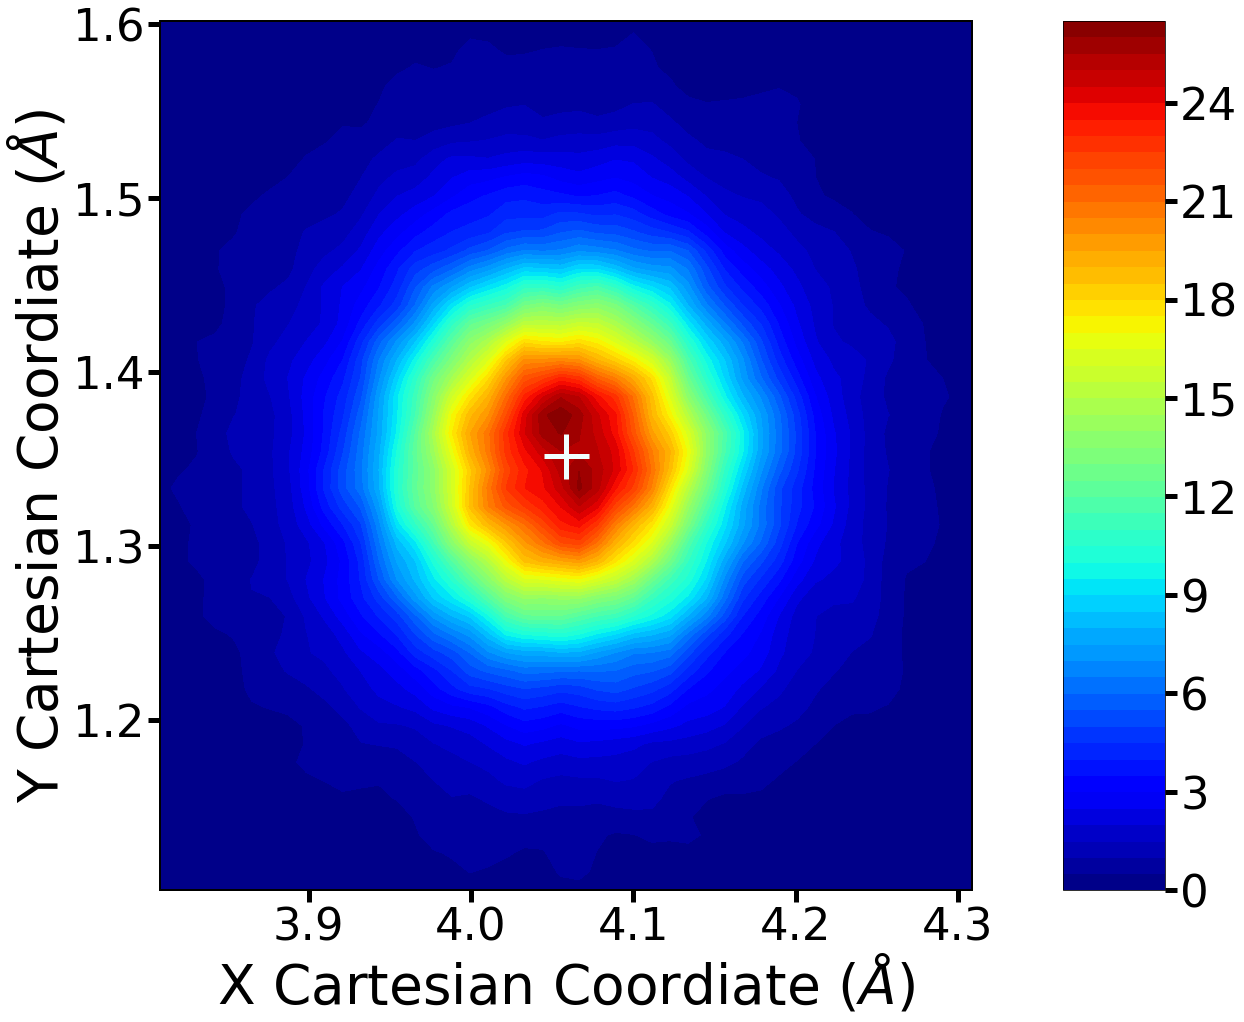

In [6]:
kde_project(filePath,[5,6],'xy',atomsSorted)

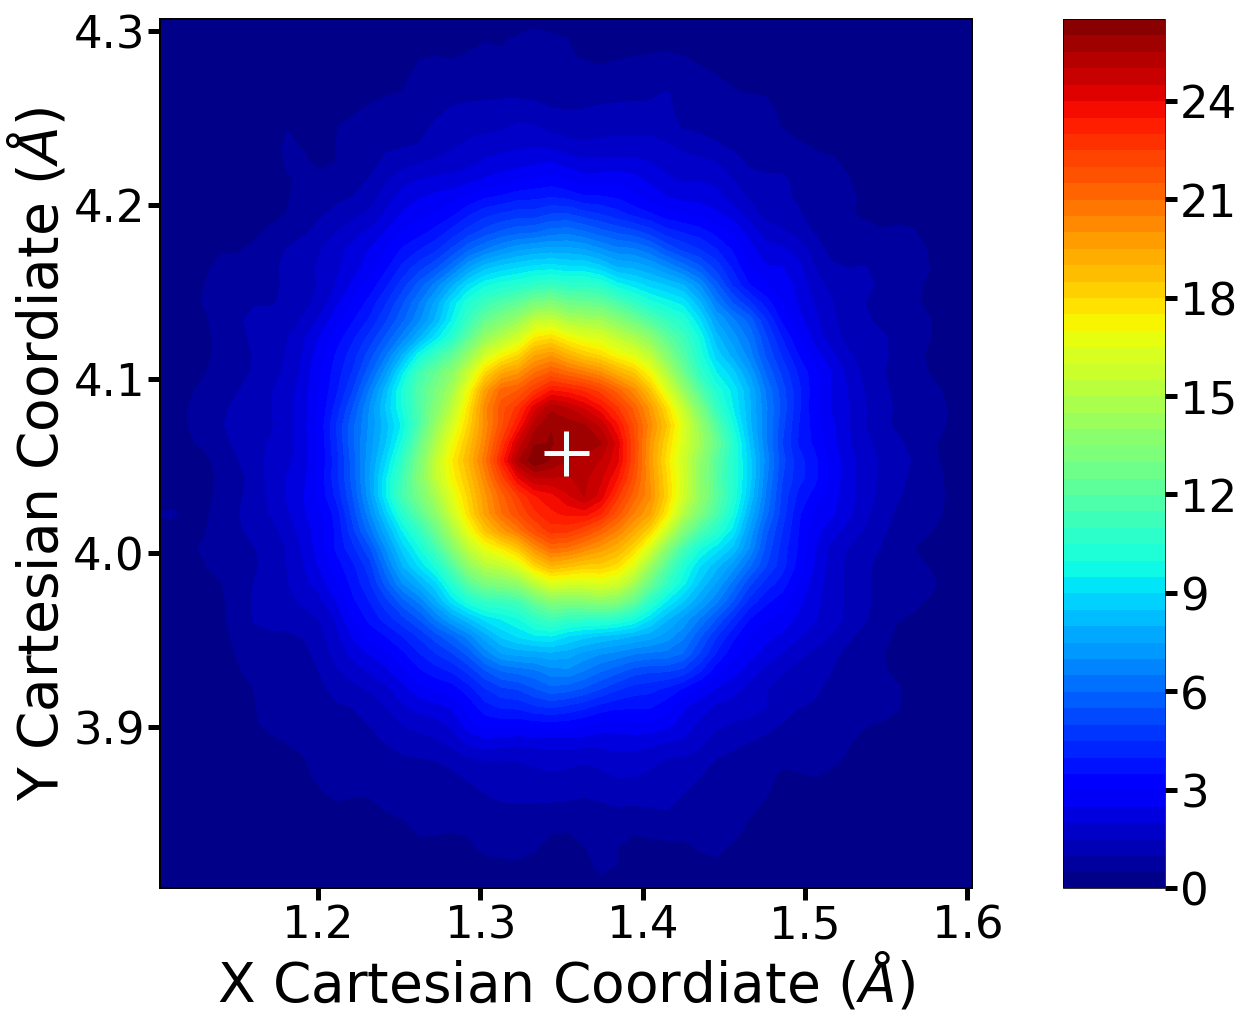

In [7]:
kde_project(filePath,[8,9],'xy',atomsSorted)

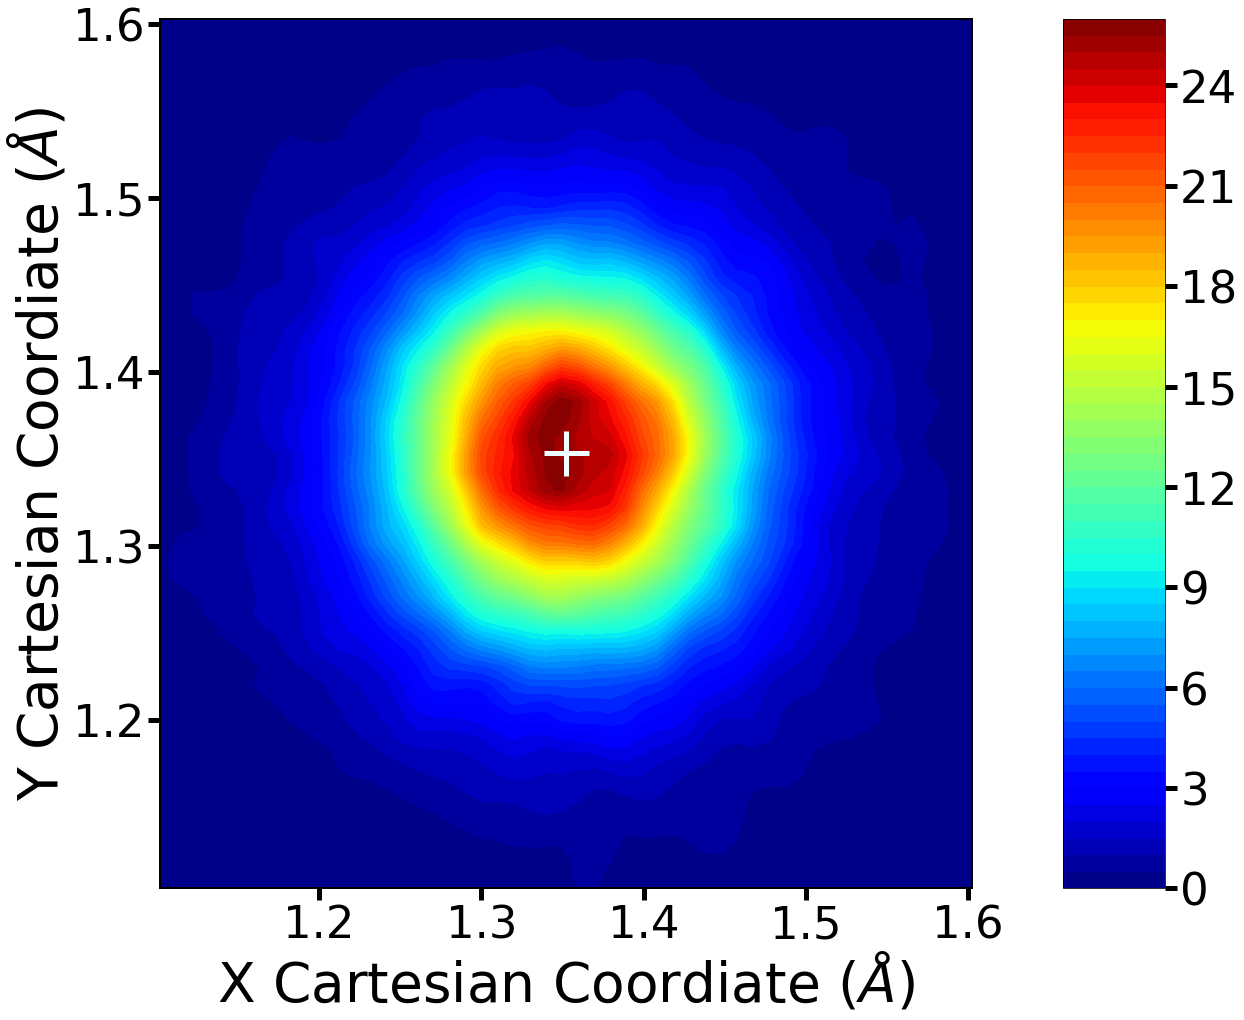

In [8]:
kde_project(filePath,[11,12],'xy',atomsSorted)

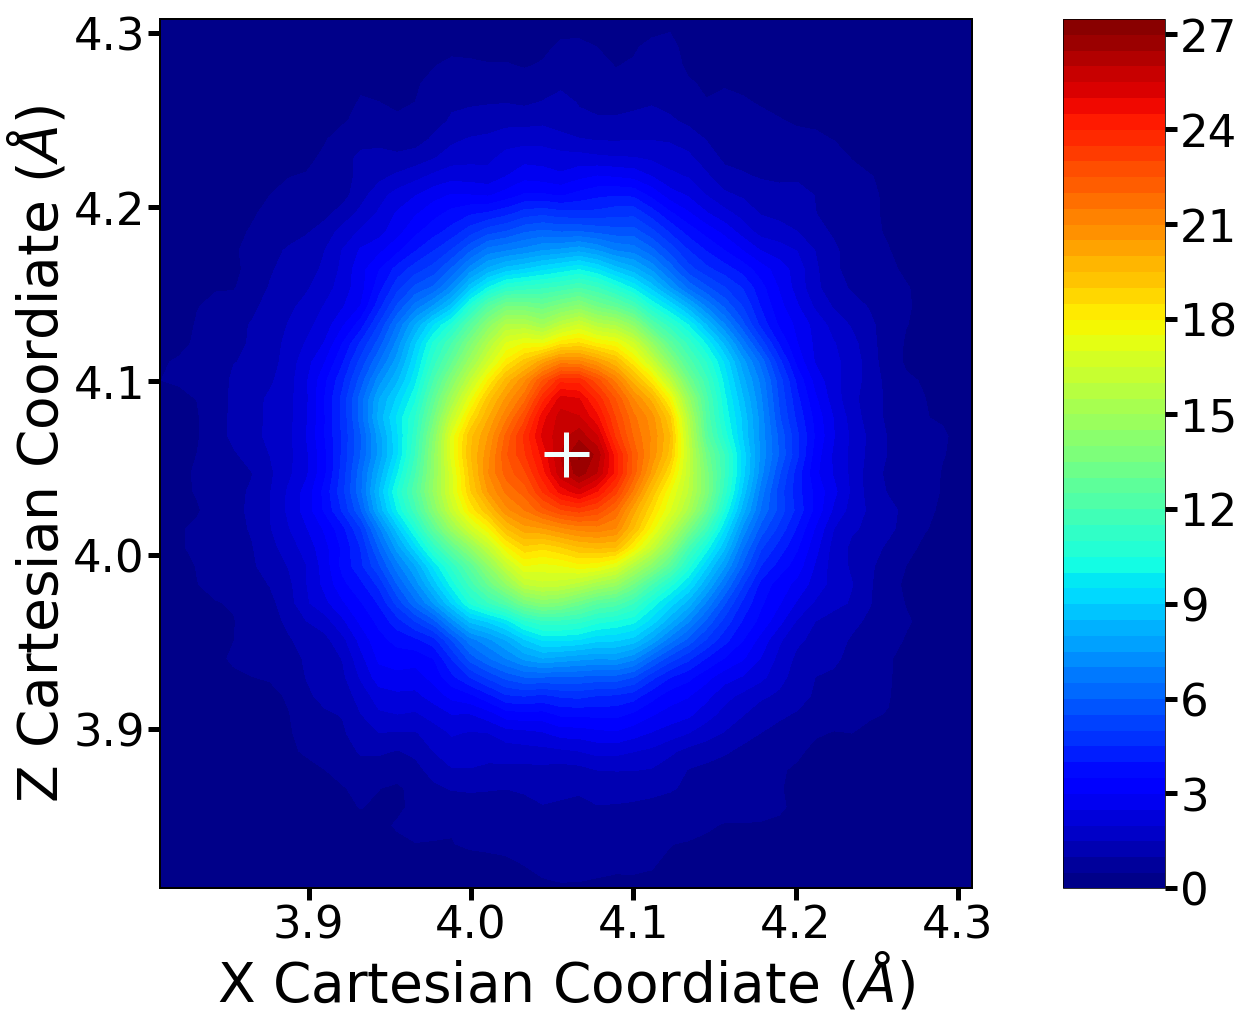

In [9]:
kde_project(filePath,[2,6],'xz',atomsSorted)

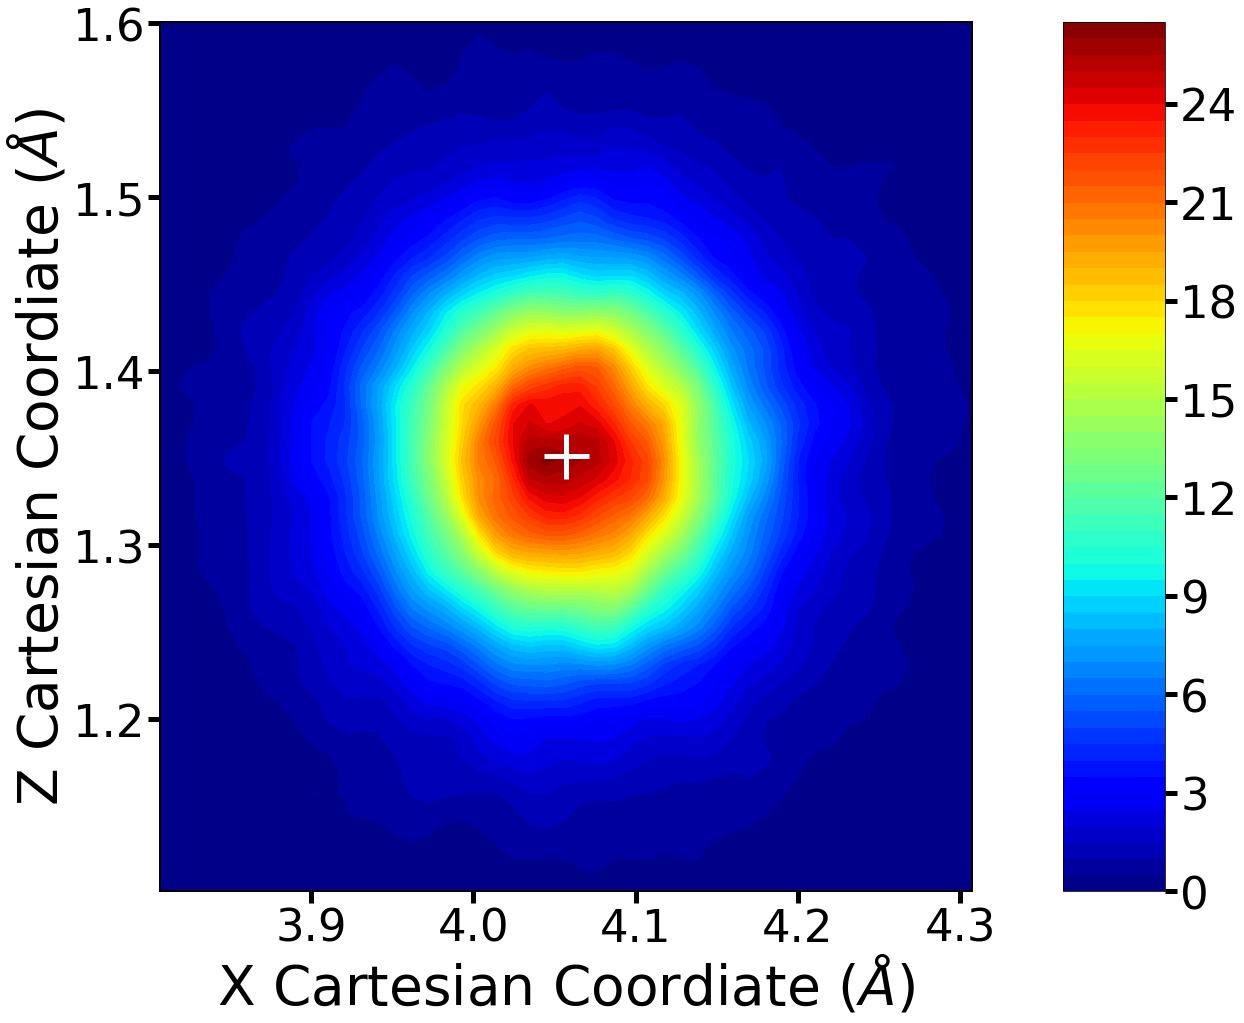

In [10]:
kde_project(filePath,[3,5],'xz',atomsSorted)

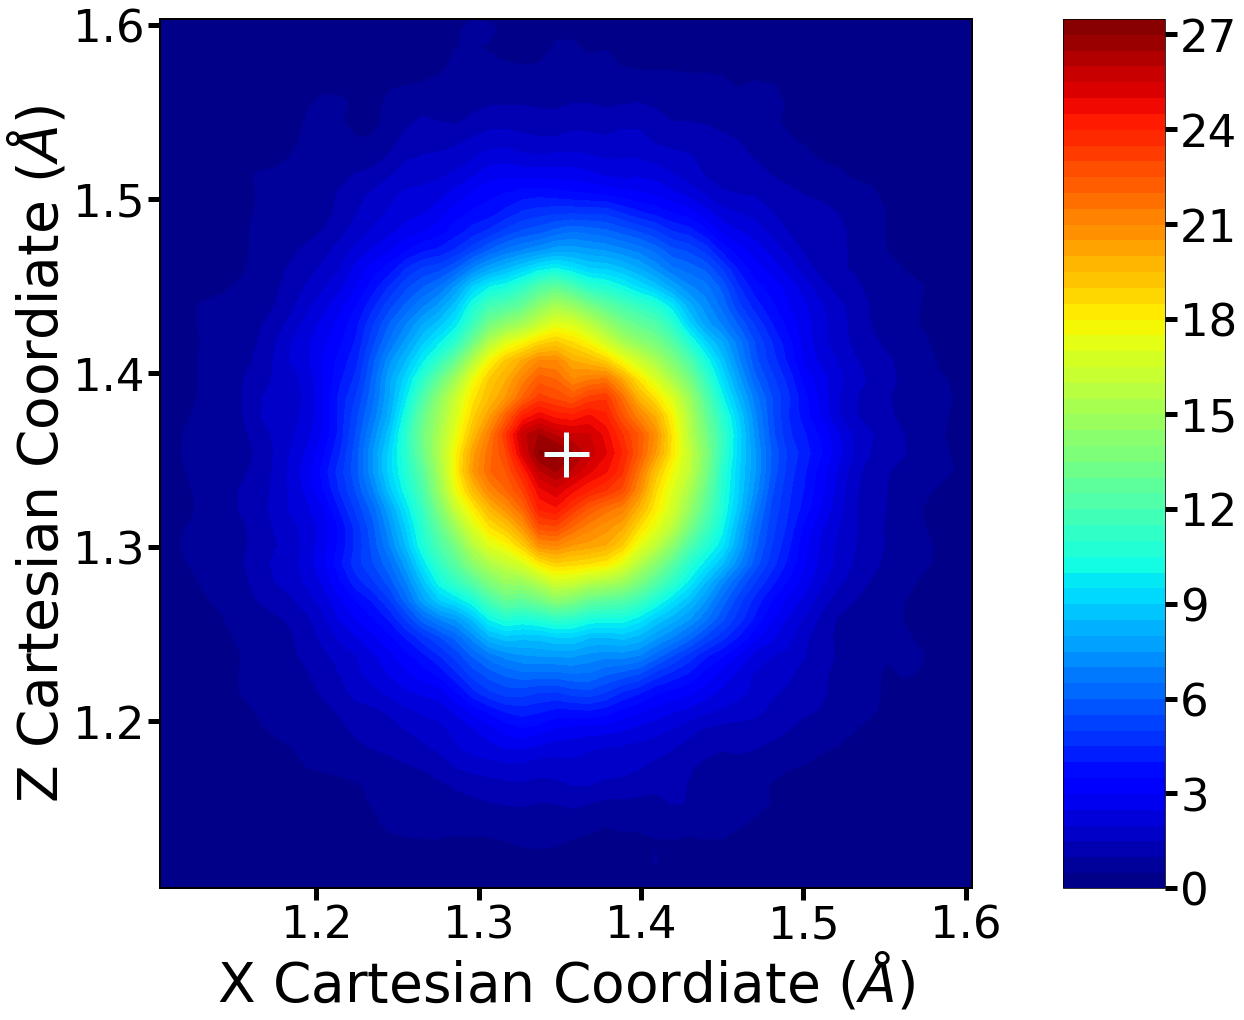

In [11]:
kde_project(filePath,[8,12],'xz',atomsSorted)

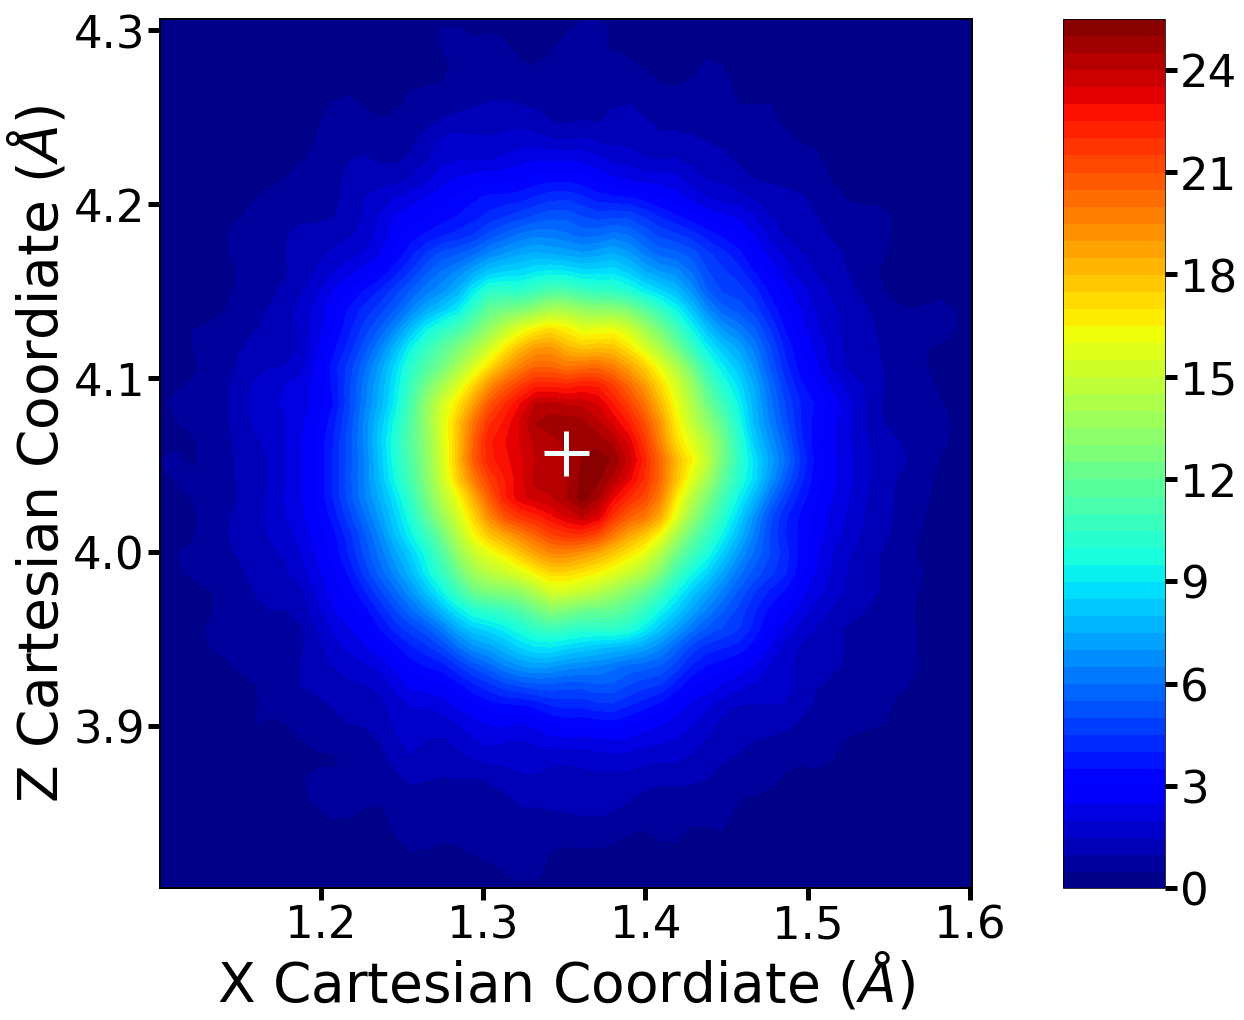

In [12]:
kde_project(filePath,[9,11],'xz',atomsSorted)

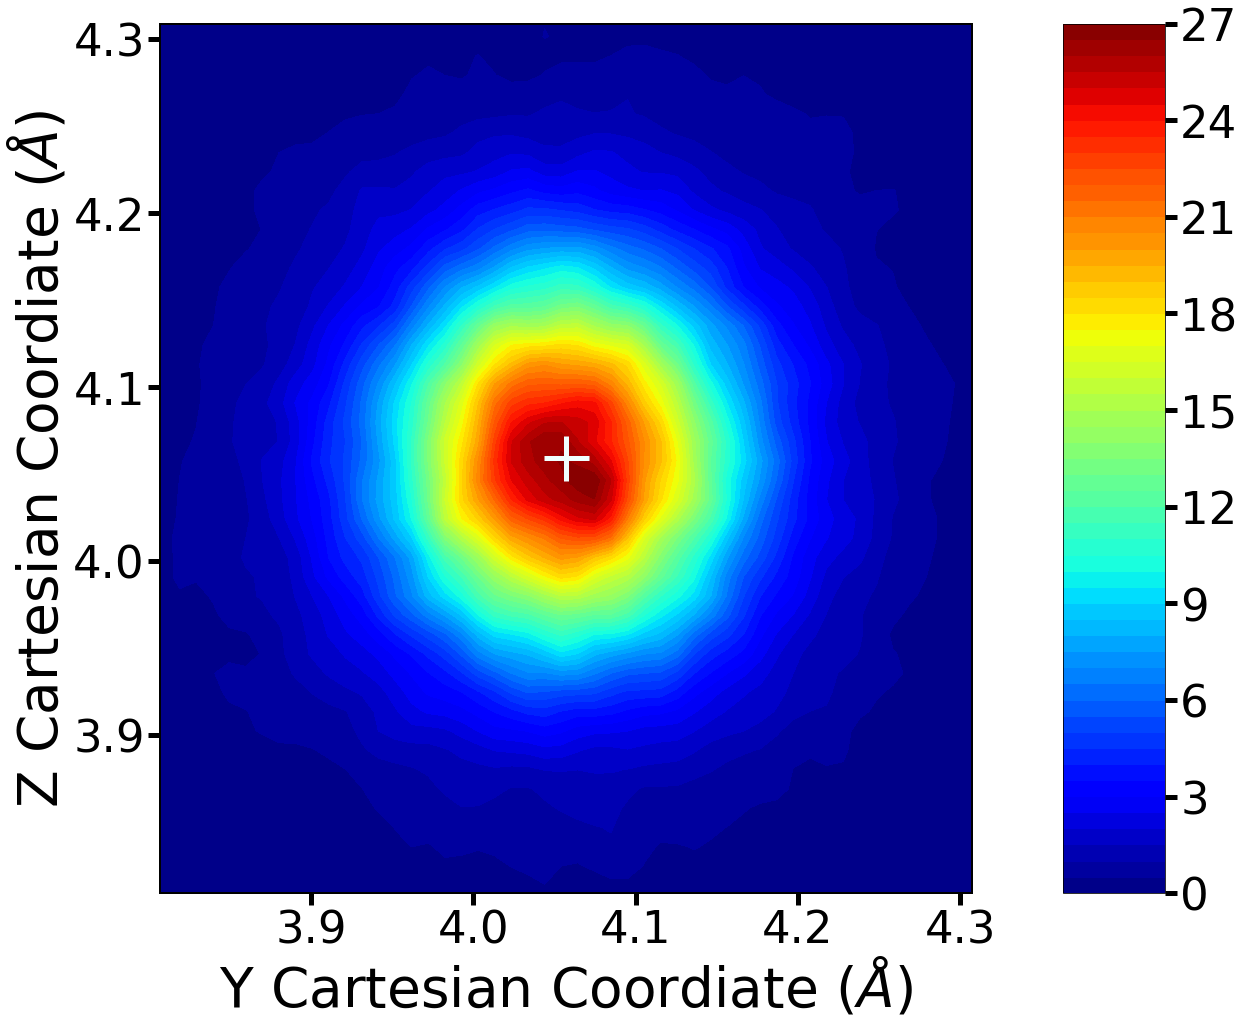

In [13]:
kde_project(filePath,[2,9],'yz',atomsSorted)

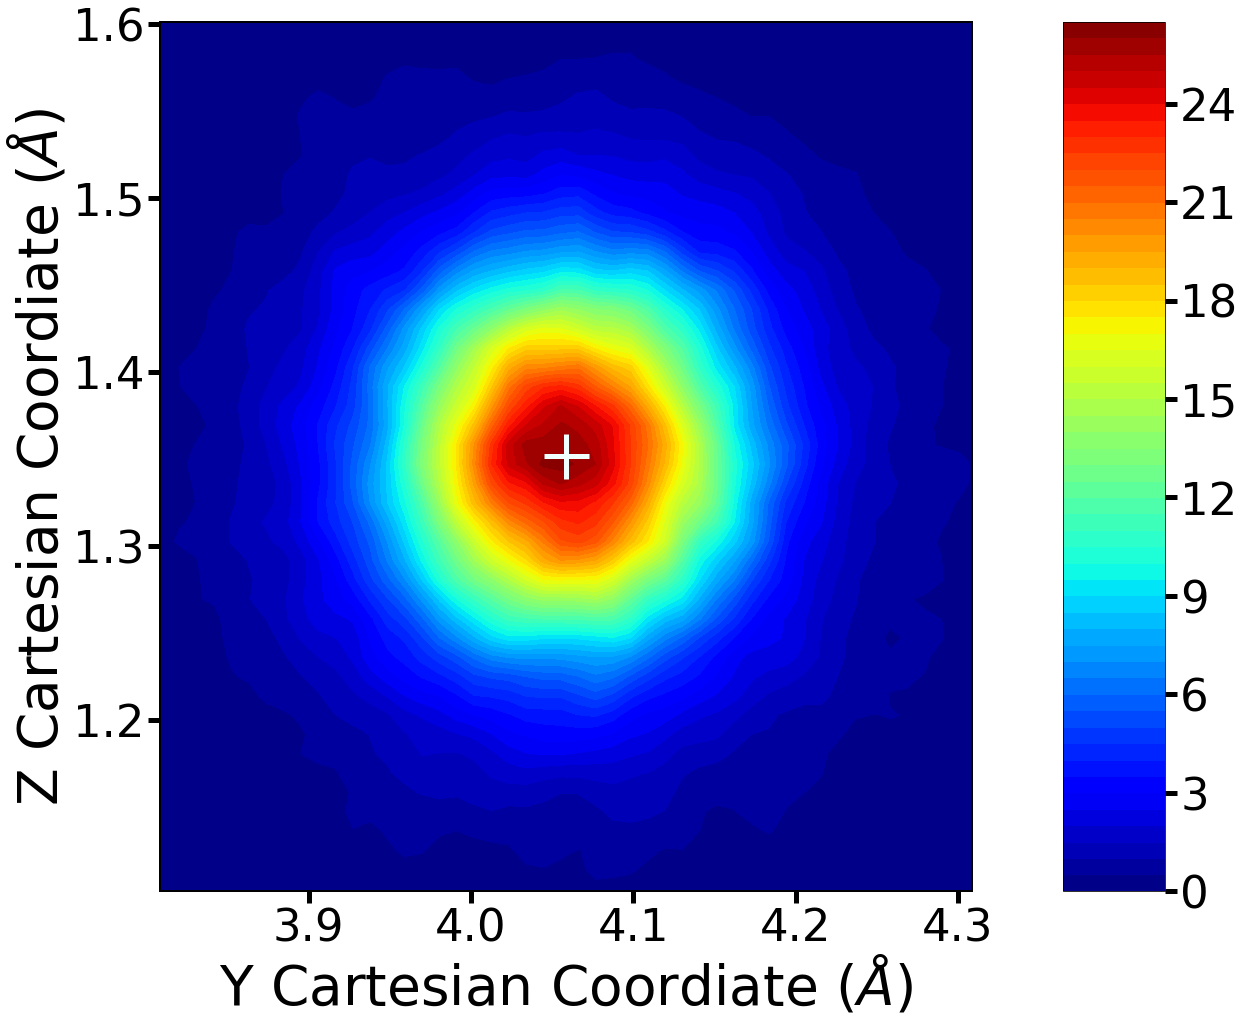

In [14]:
kde_project(filePath,[3,8],'yz',atomsSorted)

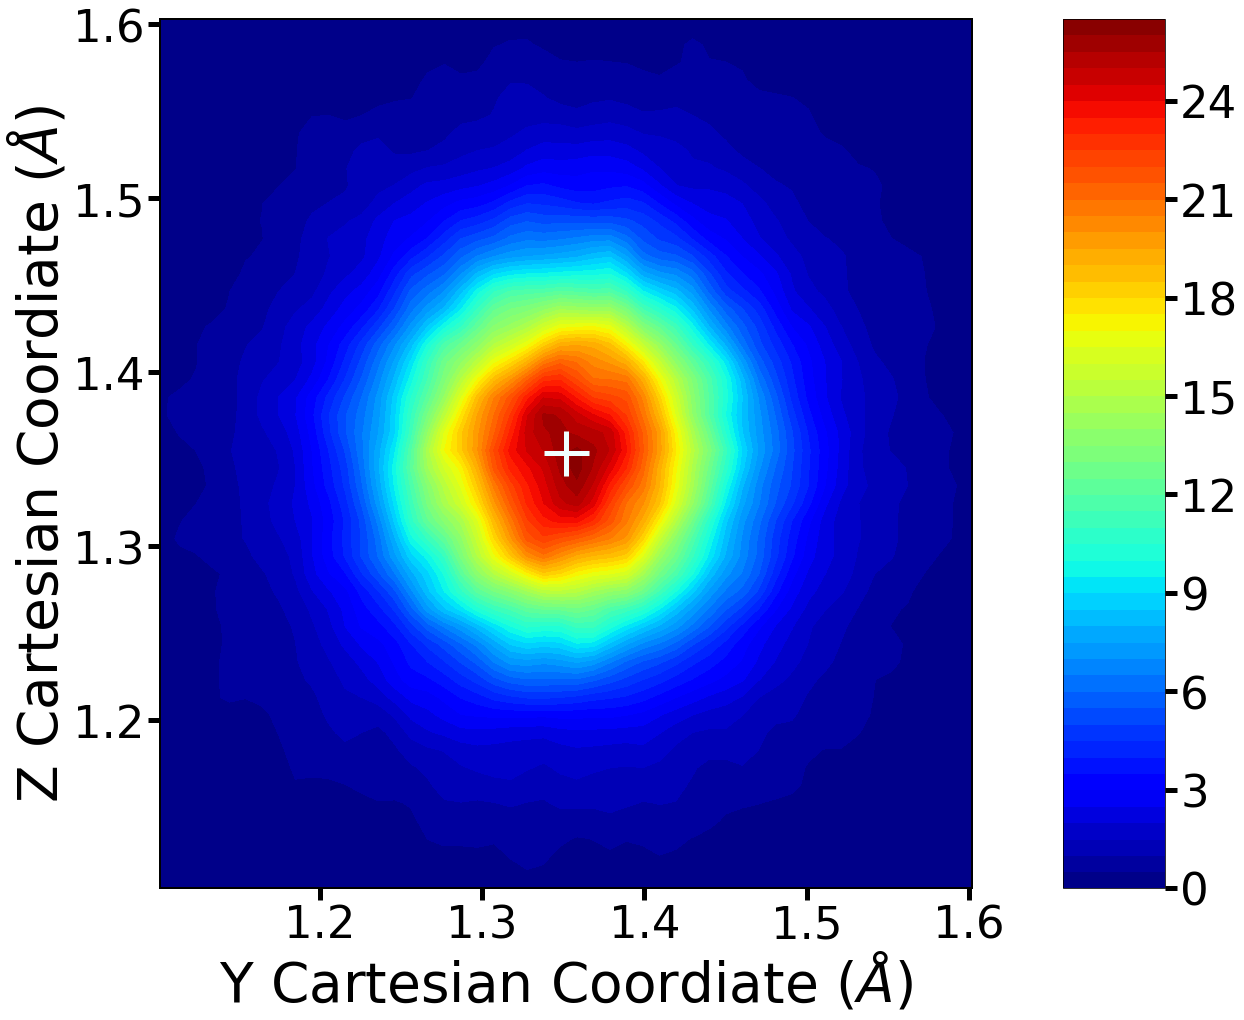

In [15]:
kde_project(filePath,[5,12],'yz',atomsSorted)

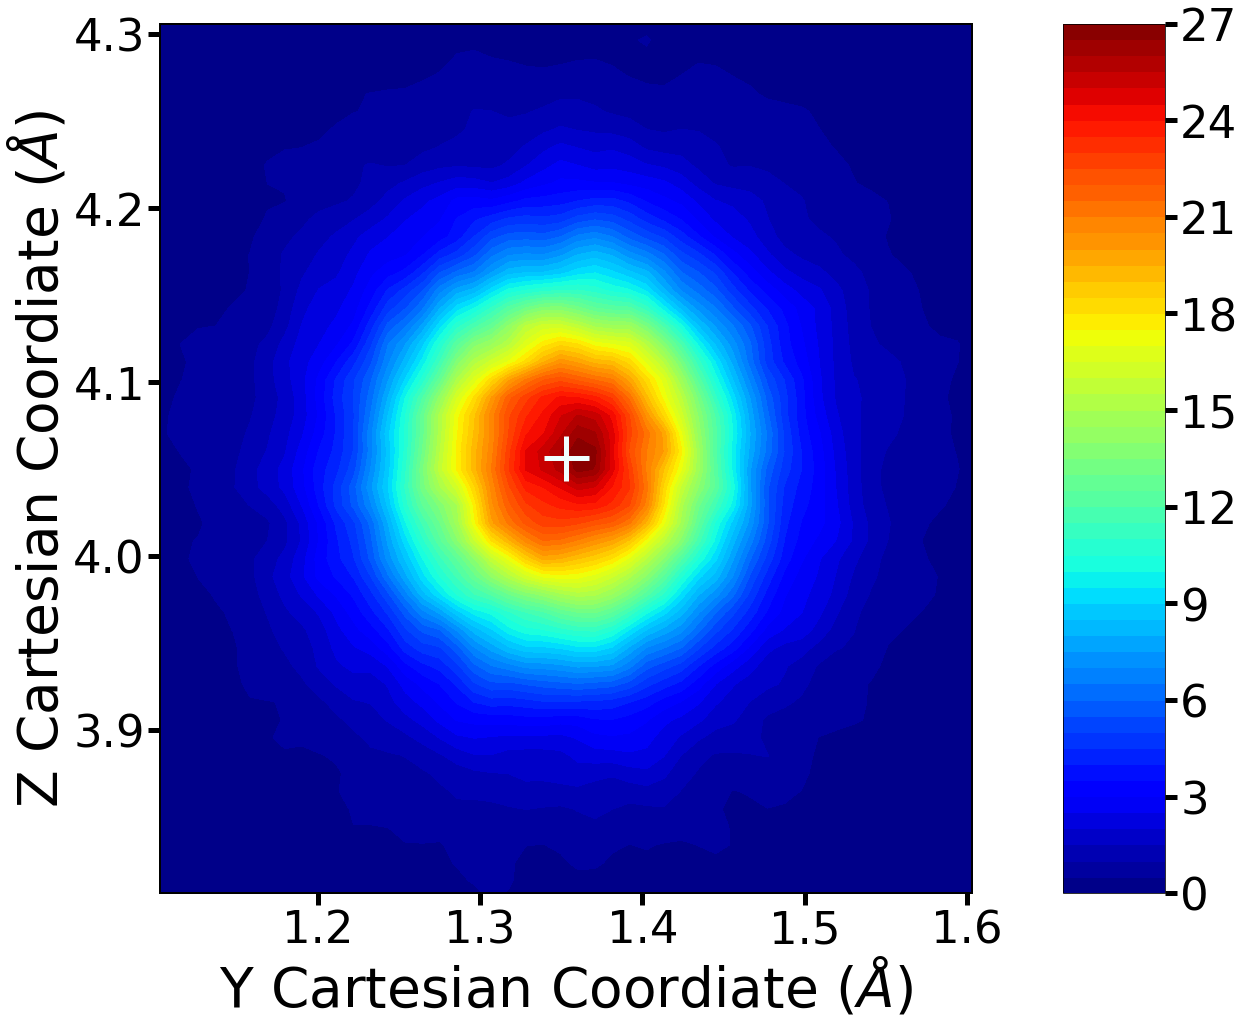

In [16]:
kde_project(filePath,[6,11],'yz',atomsSorted)

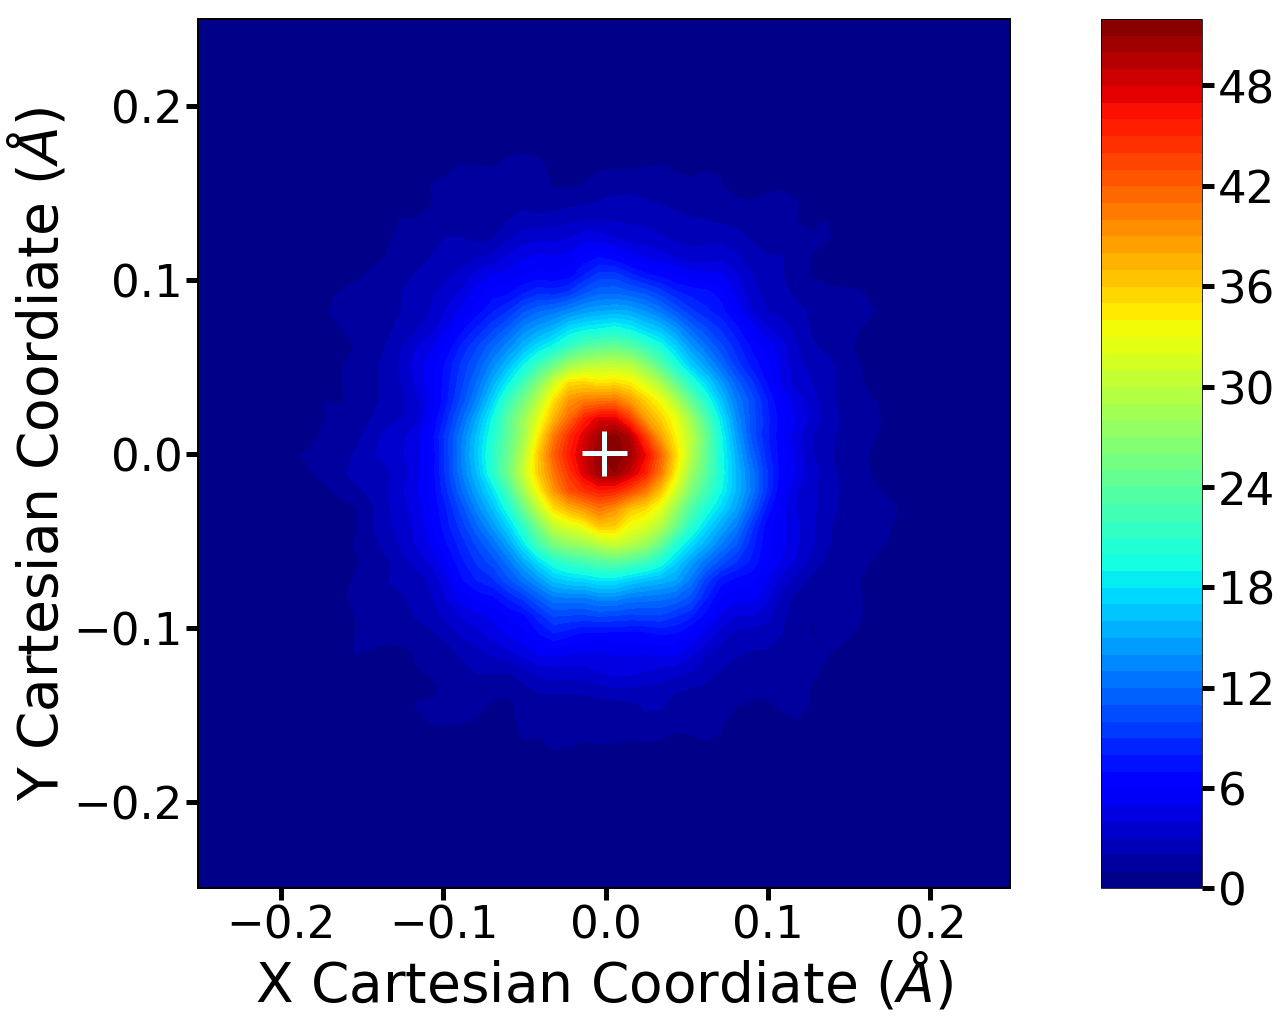

In [17]:
kde_project(filePath,[1],'xy',atomsSorted)

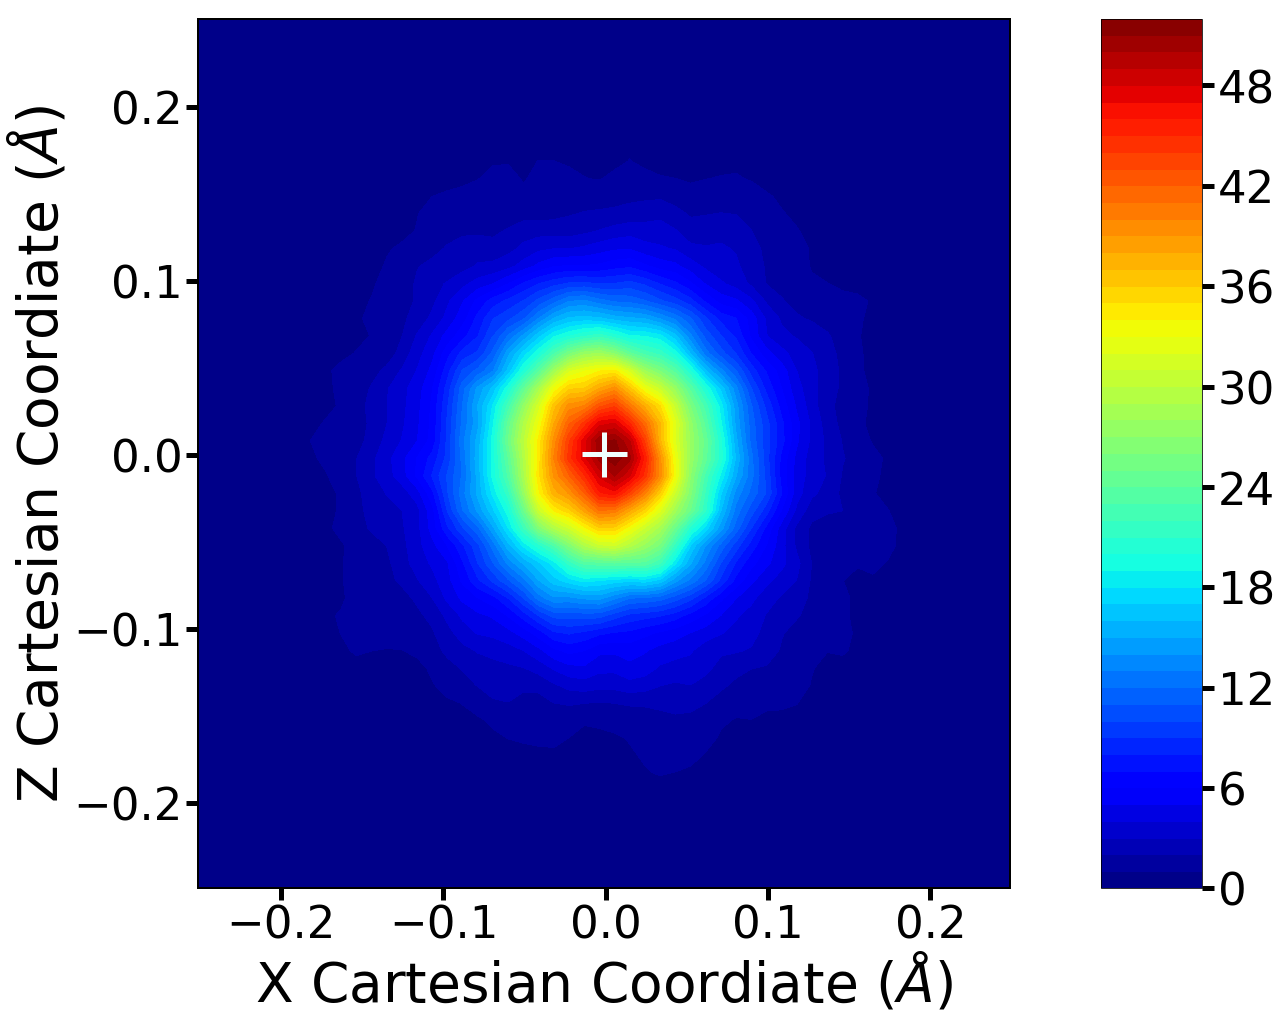

In [18]:
kde_project(filePath,[1],'xz',atomsSorted)

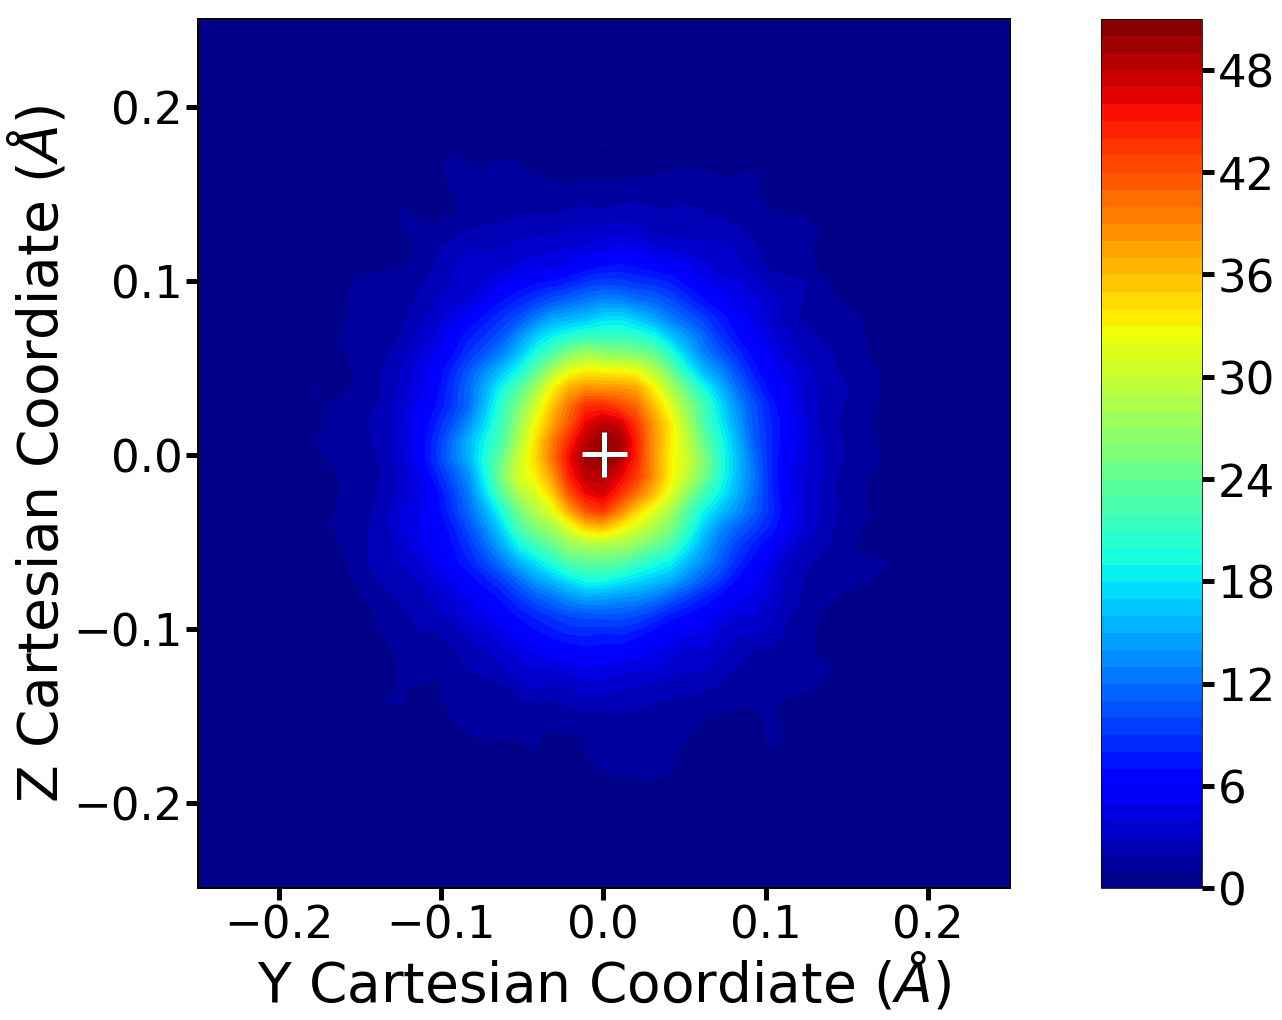

In [19]:
kde_project(filePath,[1],'yz',atomsSorted)

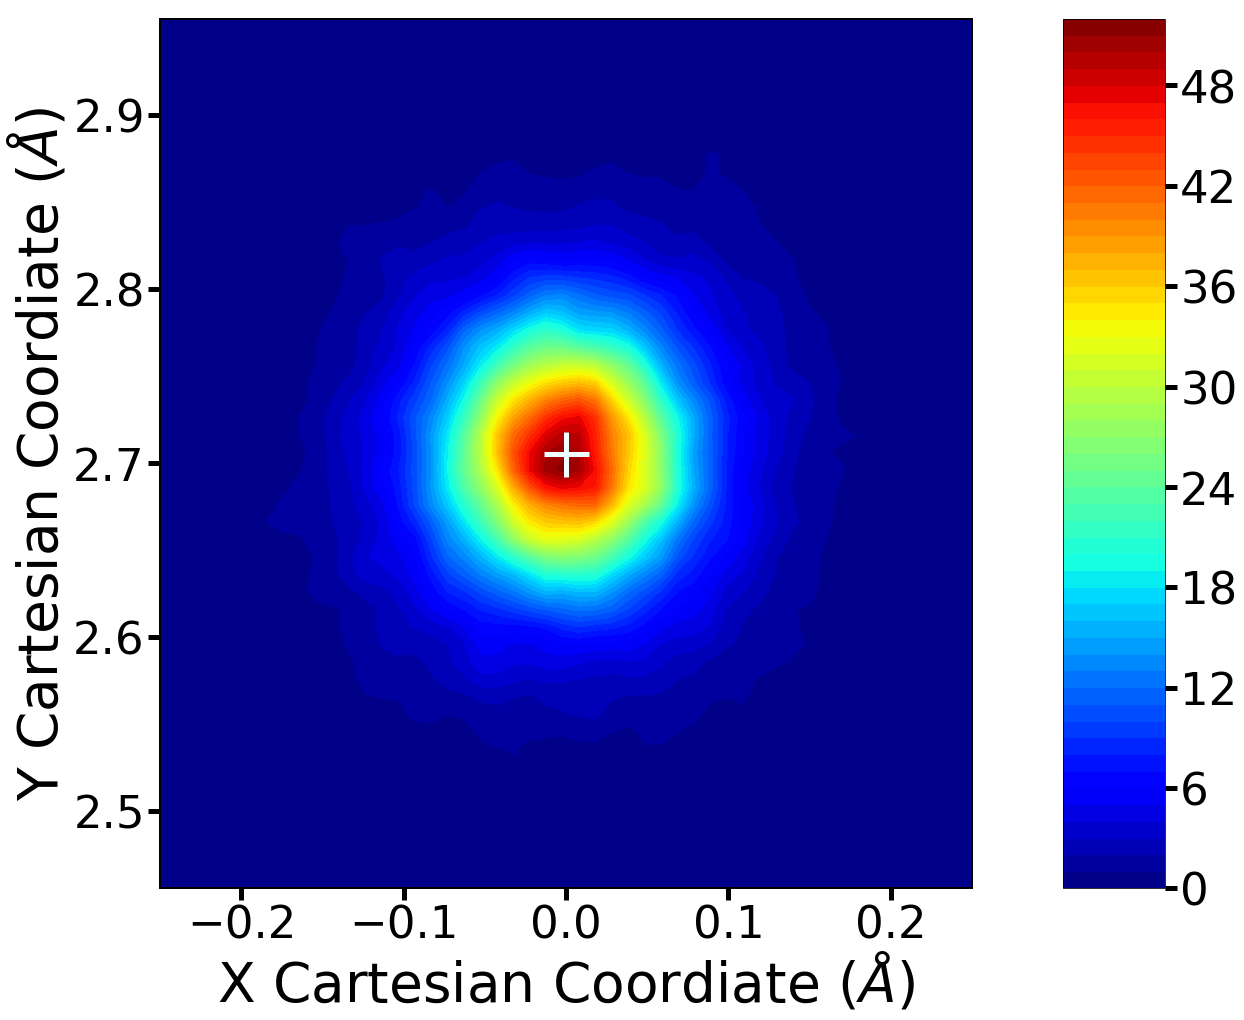

In [20]:
kde_project(filePath,[4],'xy',atomsSorted)

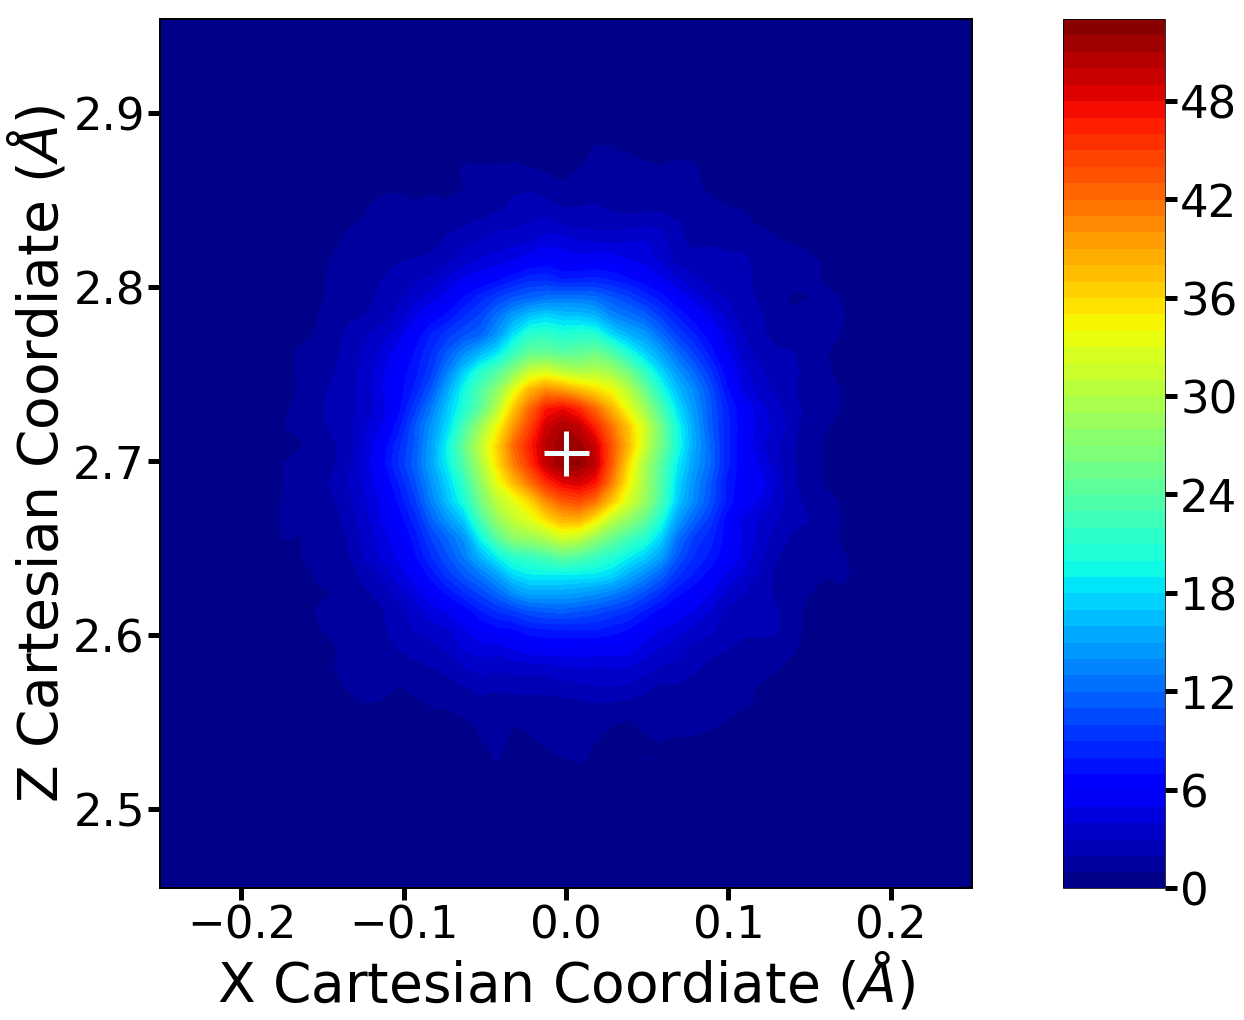

In [21]:
kde_project(filePath,[4],'xz',atomsSorted)

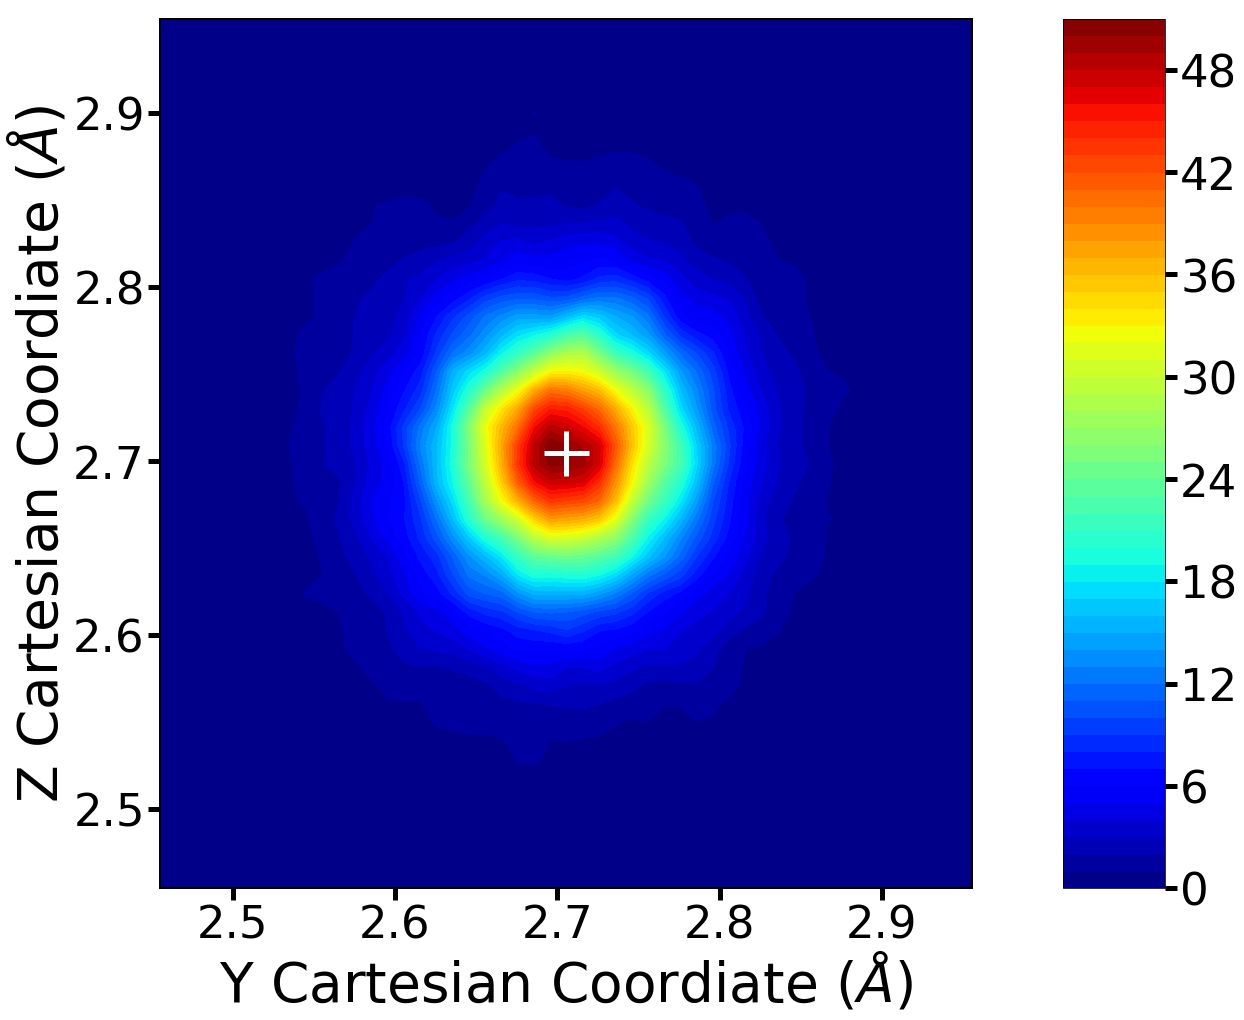

In [22]:
kde_project(filePath,[4],'yz',atomsSorted)

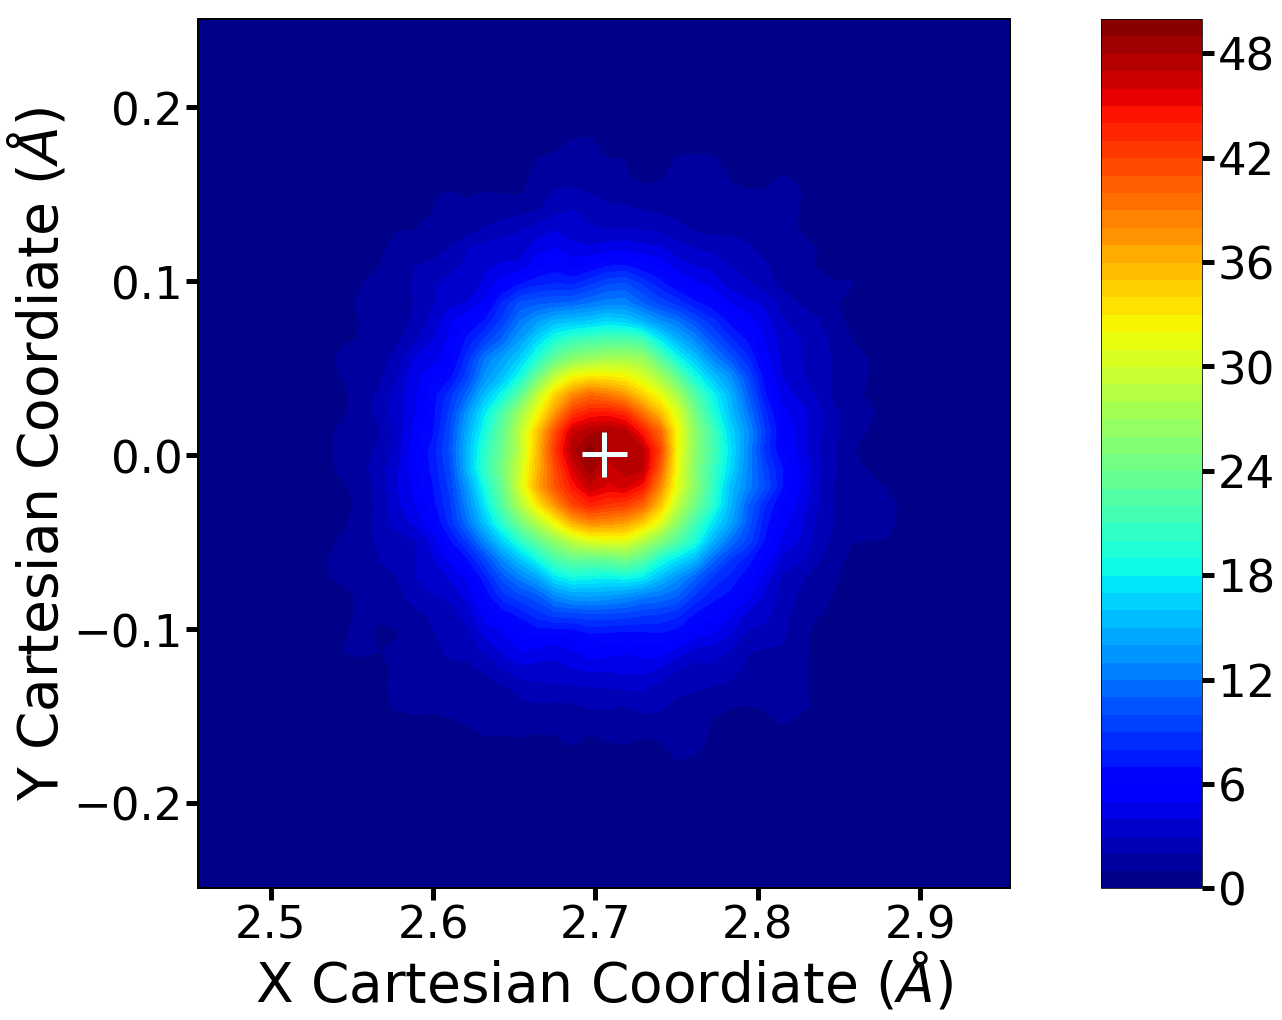

In [23]:
kde_project(filePath,[7],'xy',atomsSorted)

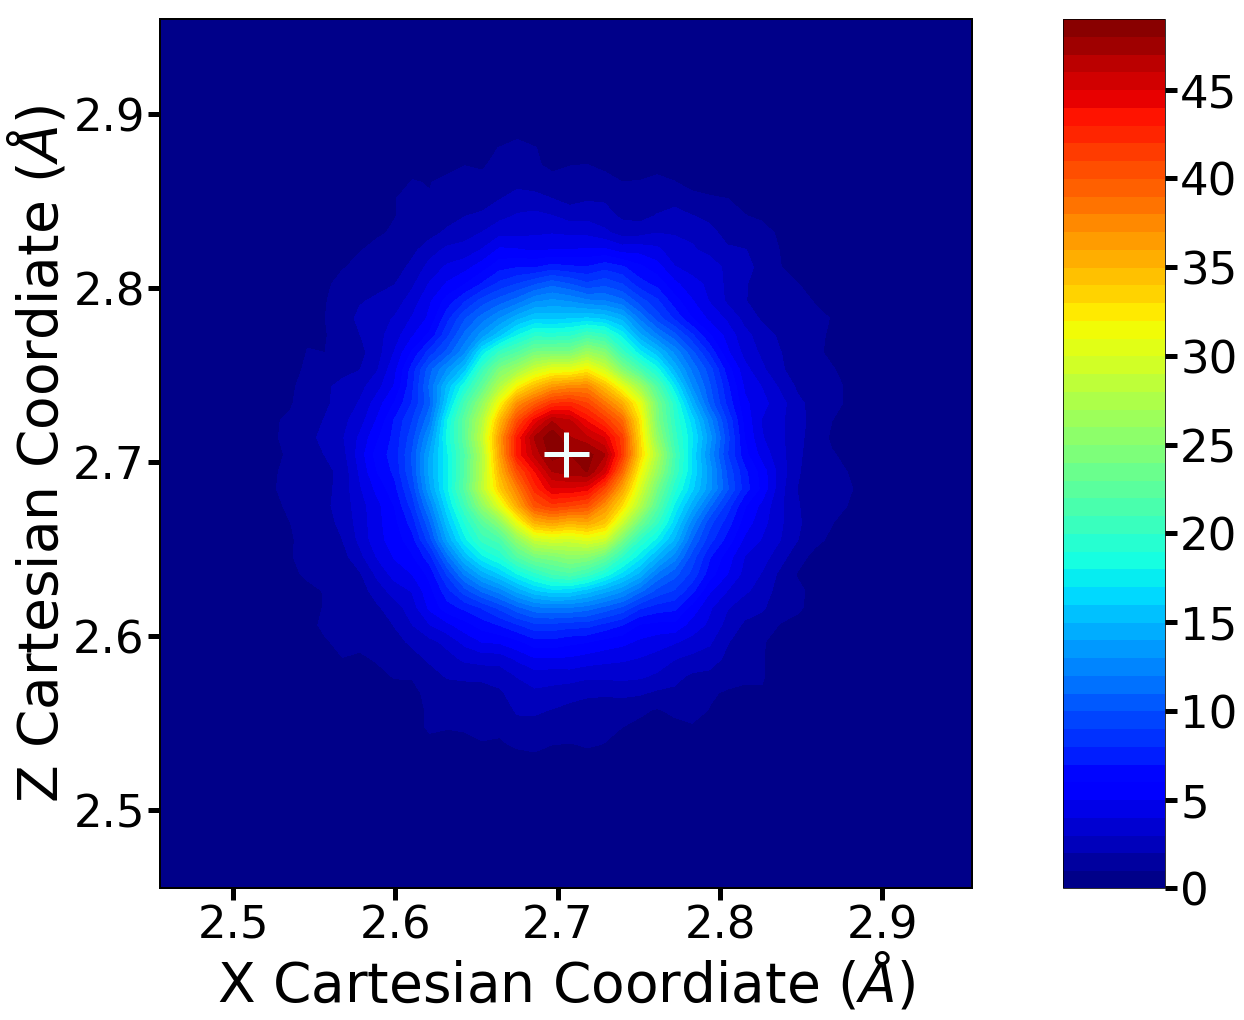

In [24]:
kde_project(filePath,[7],'xz',atomsSorted)

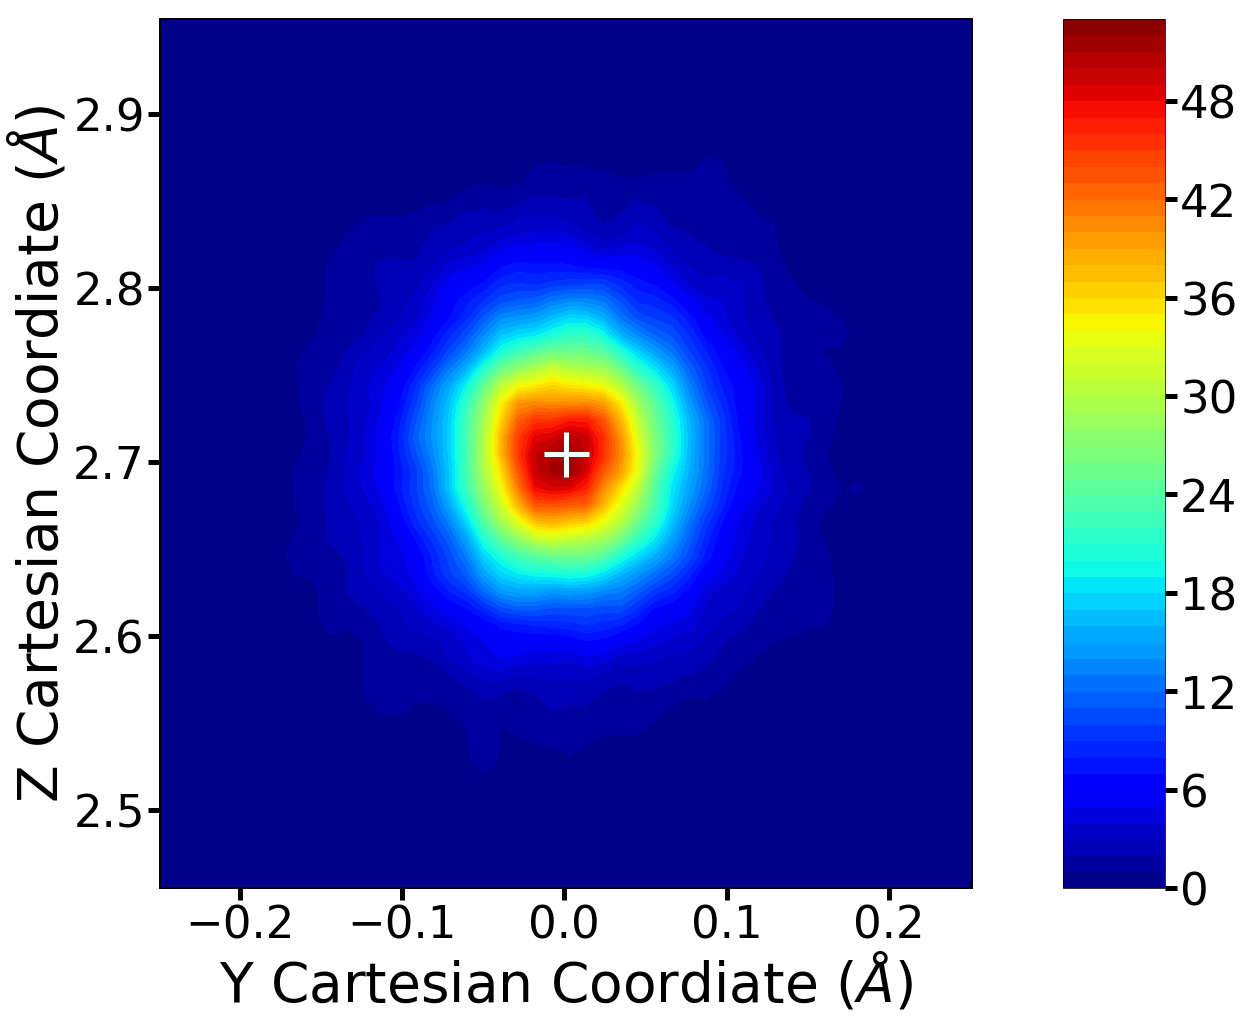

In [25]:
kde_project(filePath,[7],'yz',atomsSorted)

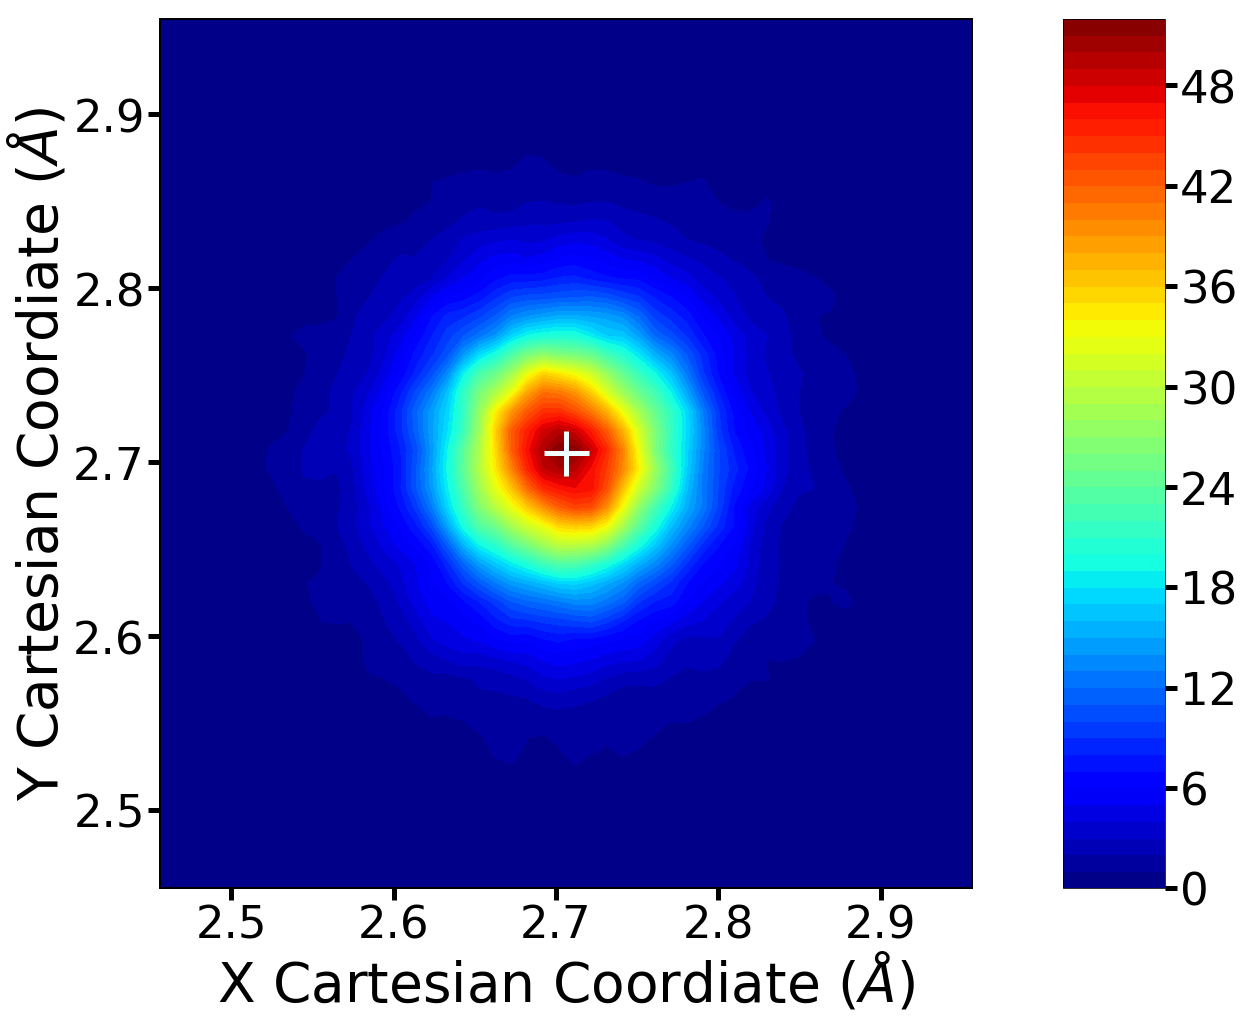

In [26]:
kde_project(filePath,[10],'xy',atomsSorted)

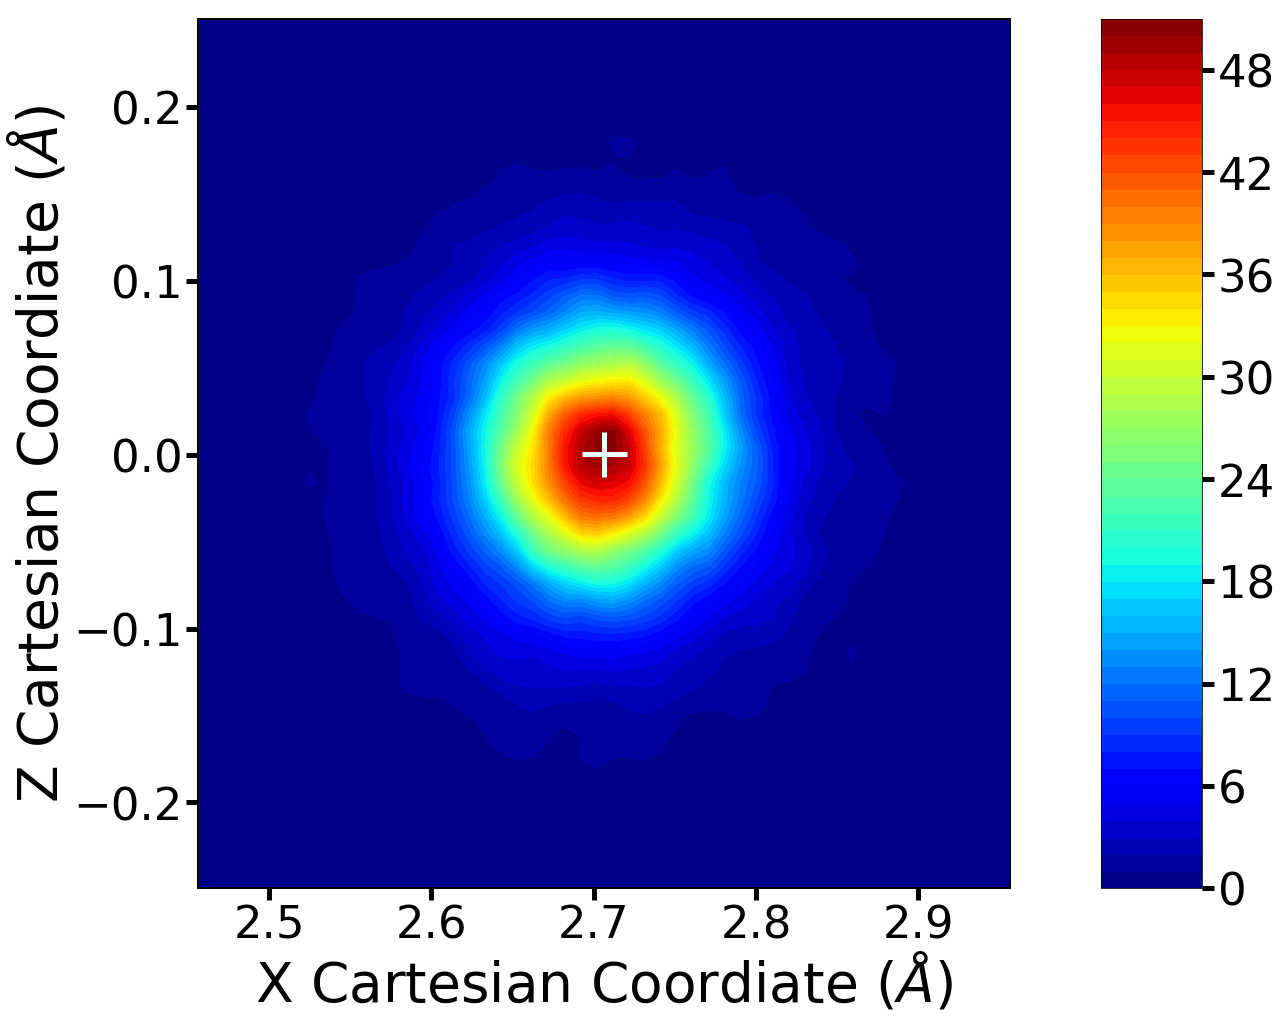

In [27]:
kde_project(filePath,[10],'xz',atomsSorted)

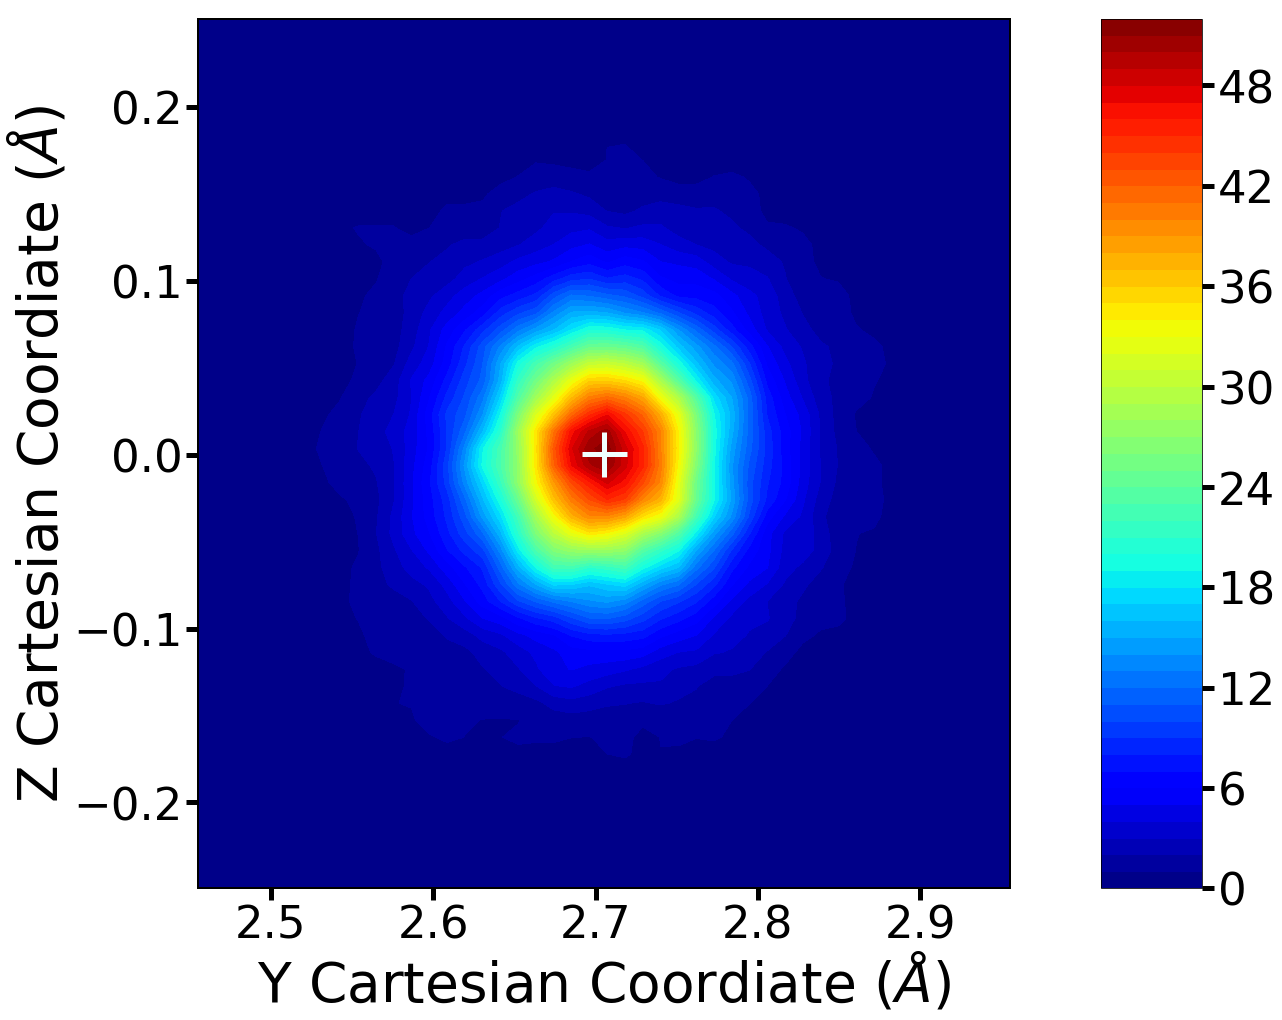

In [28]:
kde_project(filePath,[10],'yz',atomsSorted)